In [24]:
import pandas as pd

In [25]:
#load data
data=pd.read_csv(r"C:\Users\Gazala Sharaf\Downloads\Mall_Customers.csv")

In [26]:
data.shape

(200, 5)

In [27]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [29]:
data['Gender'] = data['Gender'].map({'Male':0,'Female':1})

In [30]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [35]:
data.dtypes

CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [36]:
X=data.drop(['CustomerID'],axis=1)

In [45]:
X = pd.get_dummies(X,drop_first=True)

In [46]:
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [47]:
X.shape

(200, 4)

C:\Users\Public\prog\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k: 1  wcss: 308862.06000000006
k: 2  wcss: 212889.44245524294
k: 3  wcss: 143391.59236035674
k: 4  wcss: 104414.67534220174
k: 5  wcss: 75399.61541401486
k: 6  wcss: 58348.64136331505
k: 7  wcss: 51132.70321257687
k: 8  wcss: 44392.11566567934
k: 9  wcss: 41000.87422132069


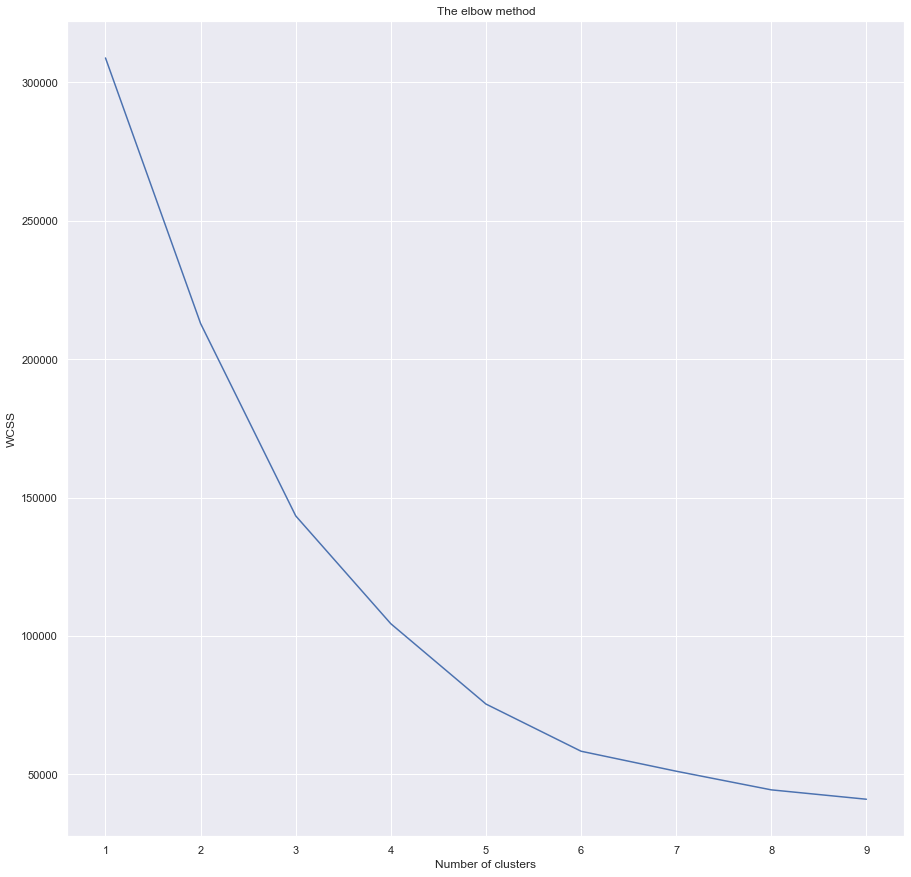

In [48]:
### Finding the optimum number of clusters for k-means classification
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #inertia is the sum of diff between centroid and corrsponding datapoint
    print('k:',i," wcss:",kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [54]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [55]:
y_kmeans

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [56]:
data['Cluster'] = y_kmeans

In [57]:
kmeans.cluster_centers_

array([[ 0.60869565, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.53846154, 32.69230769, 86.53846154, 82.12820513],
       [ 0.58227848, 43.08860759, 55.29113924, 49.56962025],
       [ 0.47222222, 40.66666667, 87.75      , 17.58333333],
       [ 0.60869565, 25.52173913, 26.30434783, 78.56521739]])

In [58]:
kmeans.inertia_

75399.61541401486

In [59]:
kmeans.n_iter_

4

In [60]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,0
1,2,0,21,15,81,4
2,3,1,20,16,6,0
3,4,1,23,16,77,4
4,5,1,31,17,40,0


In [61]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,15)})

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

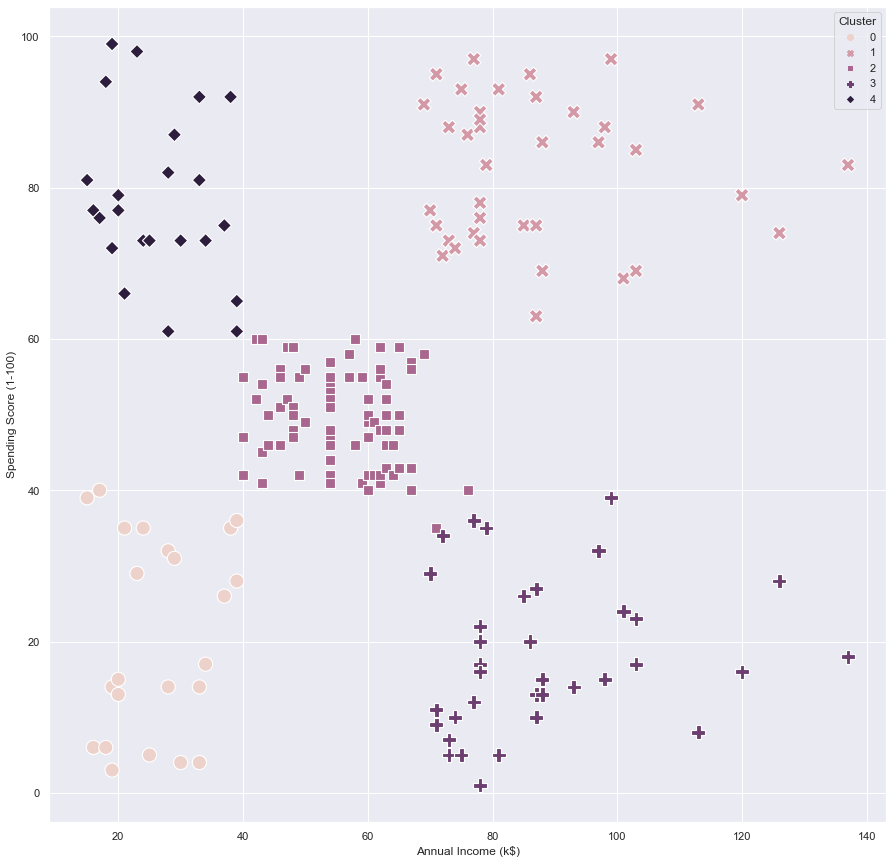

In [62]:
sns.scatterplot(data=data, x="Annual Income (k$)", y="Spending Score (1-100)",style='Cluster',hue='Cluster',s=200)

In [34]:
#END

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Age'>

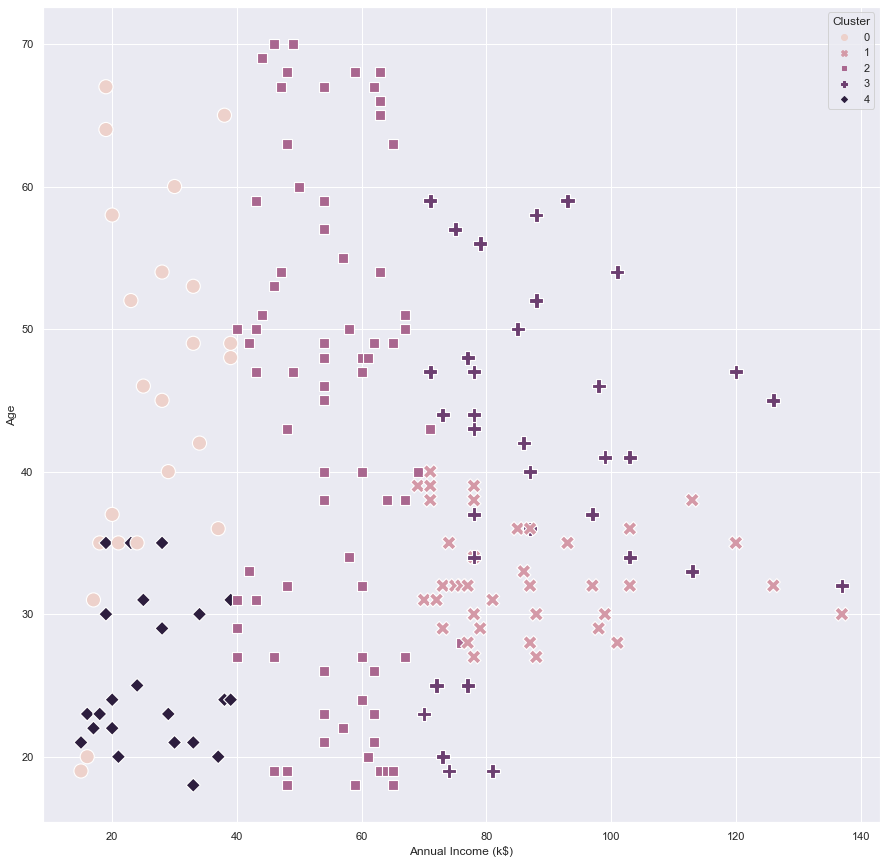

In [64]:
sns.scatterplot(data=data, x="Annual Income (k$)", y="Age",style='Cluster',hue='Cluster',s=200)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Gender'>

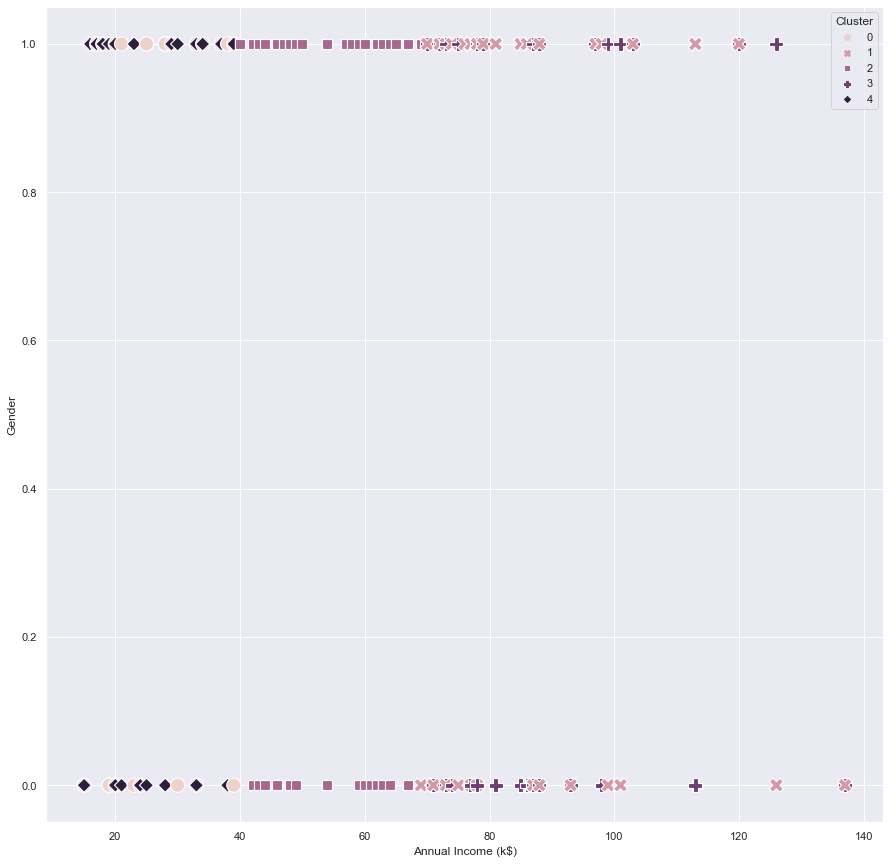

In [67]:
sns.scatterplot(data=data, x="Annual Income (k$)", y="Gender",style='Cluster',hue='Cluster',s=200)